# Diabetes Clinical Dataset(100k rows)

## About Dataset
This dataset comprises of health and demographic data of 100,000 inidividuals. The aim of this project is to build a predictive model able to predict diabetes the likelihood of diabetes on an individual based on demographic and health related features. 
 
The dataset contains 15 features all of which will be analyzed and the best feature selected

## Data pipeline

In [1]:
# load and visualize the data

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

filename = './Data/diabetes_dataset.csv'
data = pd.read_csv(filename)

# shape of the data
print(data.shape)
data.head()

(100000, 16)


,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


### statistical summary

In [3]:
pd.set_option('display.width',100)
pd.set_option('display.precision', 3)

description = data.describe()
description

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000,100000.000,100000.000,100000.0,100000.000,100000.000,100000.0,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000
mean,2018.361,41.886,0.202,0.2,0.199,0.199,0.2,0.075,0.039,27.321,5.528,138.058,0.085
std,1.345,22.517,0.402,0.4,0.399,0.399,0.4,0.263,0.195,6.637,1.071,40.708,0.279
min,2015.000,0.080,0.000,0.0,0.000,0.000,0.0,0.000,0.000,10.010,3.500,80.000,0.000
25%,2019.000,24.000,0.000,0.0,0.000,0.000,0.0,0.000,0.000,23.630,4.800,100.000,0.000
50%,2019.000,43.000,0.000,0.0,0.000,0.000,0.0,0.000,0.000,27.320,5.800,140.000,0.000
75%,2019.000,60.000,0.000,0.0,0.000,0.000,0.0,0.000,0.000,29.580,6.200,159.000,0.000
max,2022.000,80.000,1.000,1.0,1.000,1.000,1.0,1.000,1.000,95.690,9.000,300.000,1.000


### check for Distribution
this is done to determine whether the data is balanced or imbalanced.

In [5]:
class_count = data.groupby('diabetes').size()
print(class_count)

diabetes
0    91500
1     8500
dtype: int64


from the data above, it is clear the data is imbalanced indicating the need t use algorithms that best handle imbalanced data, in this context:-
- ensemble methods i.e Random forests

# visuals:


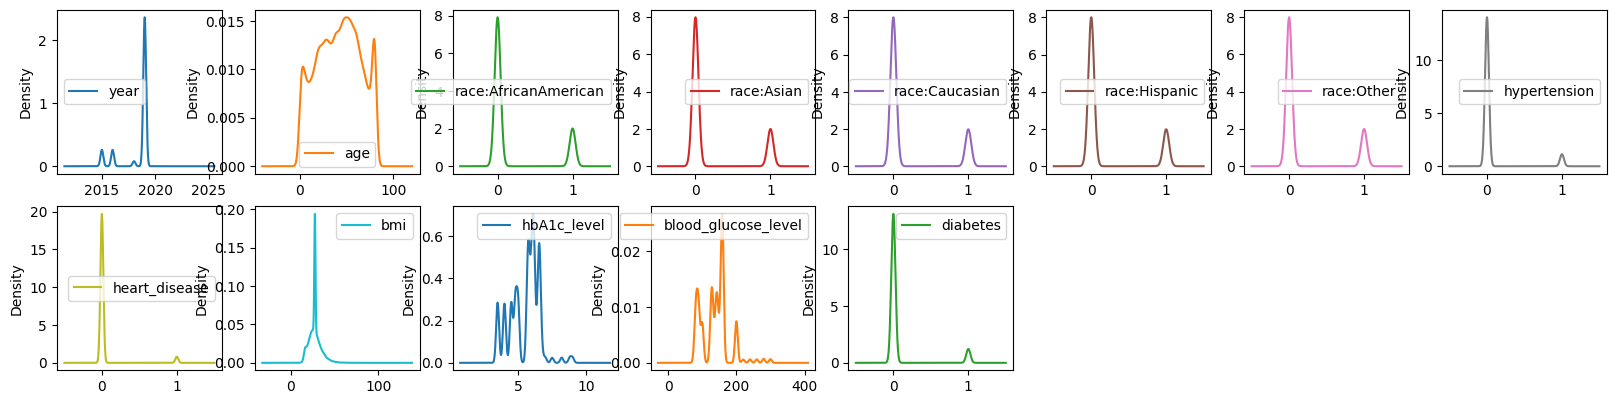

In [7]:
data.plot(kind='density', subplots=True, layout=(8,8), sharex=False, figsize=[20,20])
plt.show()

## Feature Evaluation

In [12]:
# transform the data
features = data.columns.tolist()
X = data[features]
Y = data['diabetes'].values.ravel()